## data preprocess

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
from propDEC_end2end import propDEC
import matplotlib.pyplot as plt

In [2]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
#sc.pp.highly_variable_genes(adata, n_top_genes=3000, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata)

adata.var_names_make_unique()
adata.obs_names_make_unique()

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them uniqu

In [3]:
adata

AnnData object with n_obs × n_vars = 13214 × 23419
    obs: 'sampleID', 'batch', 'patient', 'sex', 'nGene', 'nUMI', 'pctMT', 'cellType', 'batchCond', 'subclustCond', 'subIDm', 'subIDa', 'subIDn', 'subIDo', 'subIDO', 'subIDe', 'subIDu', 'subIDh', 'mg', 'astro', 'neuron', 'oligo', 'OPC', 'endo', 'UMAP1_ALL', 'UMAP2_ALL', 'PC1_ALL', 'PC2_ALL', 'PC3_ALL', 'subclustID', 'UMAP1_ct', 'UMAP2_ct', 'PC1_ct', 'PC2_ct', 'PC3_ct', 'sample_id', 'n_genes'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

In [14]:
# from dataset import Process
# data_pipeline = Process("AD")
# adata = data_pipeline.preprocess(adata)

adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

adata_AD12 = adata[adata.obs['batch']=='AD1_AD2']
adata_AD12 = adata_AD12[adata_AD12.obs['patient']!='AD-un']
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='unID'] #unID指的是unidentify
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='doublet']

adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)
adata_AD12.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

## find marker genes[to do]

/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

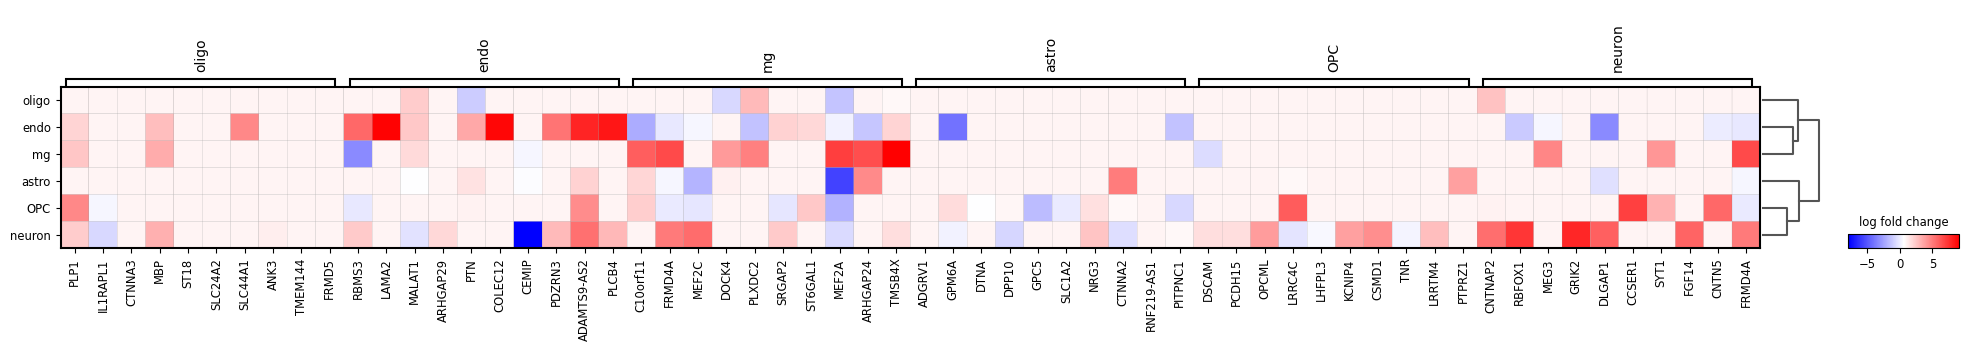

In [6]:
sc.tl.rank_genes_groups(adata_Ct34,groupby='cell.type',use_raw=False,method="wilcoxon") #method='t-test','wilcoxon',key_added='rank_genes_groups'
# adata.uns['rank_genes_groups']

sc.pl.rank_genes_groups_matrixplot(adata_Ct34,groupby='cell.type',values_to_plot='logfoldchanges',cmap='bwr') #sc.pl.matrixplot,values_to_plot='scores',logfoldchanges

a lot of the differentially expressed genes are highly expressed in multiple clusters. 
We can filter the differentially expressed genes to select for more cluster-specific differentially expressed genes:

/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


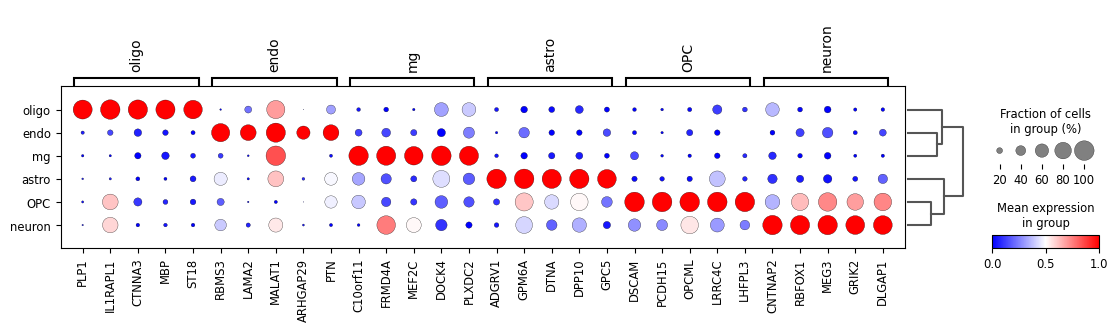

In [7]:
sc.tl.filter_rank_genes_groups(
    adata_Ct34,groupby="cell.type",
    min_in_group_fraction=0.8,
    max_out_group_fraction=0.2,
) #Filters out genes based on log fold change and fraction of genes expressing the gene within and outside the `groupby` categories

sc.pl.rank_genes_groups_dotplot(
    adata_Ct34, groupby="cell.type", standard_scale="var", n_genes=5,cmap='bwr',
    # key='rank_genes_groups_filtered'
)

In [8]:
## 1.find marker genes
sc.tl.rank_genes_groups(adata_Ct34,groupby='cell.type',use_raw=False,method="wilcoxon") #method='t-test','wilcoxon'
# sc.pl.rank_genes_groups_matrixplot(adata,groupby='Pred_detail',values_to_plot='logfoldchanges',cmap='bwr')

## 2.select top_n marker genes
sc.tl.filter_rank_genes_groups(adata_Ct34,groupby="cell.type",min_in_group_fraction=0.8,max_out_group_fraction=0.2) 
# sc.pl.rank_genes_groups_dotplot(adata, groupby="Pred_detail", standard_scale="var", n_genes=top_n_genes,cmap='bwr')

/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

In [16]:
markers=sc.get.rank_genes_groups_df(adata_Ct34, group=adata_Ct34.obs['cell.type'].unique())
markers=markers.loc[~ markers.names.isna()]
markers['abs_score']=markers.scores.abs()
markers.sort_values('abs_score',ascending=False,inplace=True)
markers = markers.groupby('group').head(1000).sort_values('group')['names'].unique()#用list来画图

KeyError: 'rank_genes_groups'

In [17]:
len(markers)

2647

In [20]:
adata_Ct34 = adata_Ct34[:,markers]
adata_AD12 = adata_AD12[:,markers]
adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)
adata_AD12.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

In [22]:
adata_Ct34.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_train.h5ad')
adata_AD12.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_test.h5ad')

## ks test
只能按列进行检验，那我是矩阵的数据的话，还得想想怎么结合进去

In [7]:
import numpy as np
from scipy.stats import ks_2samp
 
data0 = [1,2,3,4,5,6,7,8,9,10]
data1 = [2,4,6,8,10,11,12,13,14,15]
#scipy.stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')
#date1,date2是要进行比较的两个数据集，alternative默认是'two-sided',mode默认是'auto'
_, pvalues= ks_2samp(data0, data1)#pvalue>0.05不拒绝H0，认为分布一致

In [8]:
pvalues

0.16782134274394334

## run propDEC

In [1]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
# create dataset
pipeline = propDEC(input_size=2647, num_classes=6, metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints
Got 2078 / 2187 with accuracy' 95.02%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2058 / 2187 with accuracy' 94.10%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2152 / 2187 with accuracy' 98.40%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2124 / 2187 with accuracy' 97.12%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
Got 2135 / 2187 with accuracy' 97.62%
==> resample
==> Write the resample annotated data to cache


/volume1/home/mhuang/cellTypeAbundance/src/test/utils.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


==> Write the reweighted data to cache
==> Finish!


/volume1/home/mhuang/cellTypeAbundance/src/test/propDEC_end2end.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = self.test_adata.obs.groupby('cell.type').count()/len(self.test_adata)


In [4]:
proportion

,ref,predict_1,predict_2,predict_3,predict_4,predict_5,Ground_truth
OPC,0.144558,0.0139,0.0347,0.0248,0.0283,0.0277,0.014632
astro,0.286735,0.0431,0.0586,0.0435,0.0484,0.0465,0.043439
endo,0.010884,0.0014,0.0110,0.0025,0.0044,0.0034,0.002286
mg,0.047279,0.0045,0.0229,0.0086,0.0128,0.0114,0.009145
neuron,0.041837,0.0126,0.0558,0.0470,0.0518,0.0501,0.044353
oligo,0.468707,0.9246,0.8170,0.8736,0.8543,0.8610,0.886145


In [5]:
f1scores

,predict_1,predict_2,predict_3,predict_4,predict_5
f1score_micro,0.950160,0.941015,0.983996,0.971193,0.976223
f1score_macro,0.700143,0.750549,0.920136,0.898590,0.917692


In [6]:
precision

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.793103,0.457143,0.592593,0.524590,0.524590
astro,0.989474,0.719697,0.979167,0.887850,0.922330
endo,1.000000,0.384615,1.000000,1.000000,1.000000
mg,1.000000,0.444444,1.000000,0.740741,0.869565
neuron,1.000000,0.822034,0.932692,0.866071,0.889908
oligo,0.949828,1.000000,0.997907,1.000000,1.000000


In [7]:
recall

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.718750,1.000000,1.000000,1.000000,1.000000
astro,0.989474,1.000000,0.989474,1.000000,1.000000
endo,0.400000,1.000000,0.800000,1.000000,1.000000
mg,0.400000,1.000000,0.900000,1.000000,1.000000
neuron,0.206186,1.000000,1.000000,1.000000,1.000000
oligo,0.996388,0.933437,0.984004,0.967492,0.973168
